## NumPy. Практика

В этом задании **запрещено использовать циклы**, если в задании явно не указано обратное. Также **запрещено использовать следующие функции:**
- `np.repeat`;
- `np.tile`;
- `np.take`;
- `np.take_along_axis`;
- `np.apply_along_axis`.

In [3]:
import numpy as np

### Задание 1 (1 балл)

Дан одномерный массив $a$. Превратите массив $a$ в вектор-столбец – `a.shape == (6, 1)`. Результат сохраните в переменную `a_new`. Приведите как **минимум 3 способа** решения этой задачи.

In [4]:
a = np.ones(6, dtype=int)

#### 1 Способ

In [14]:
# Способ 1: Использование reshape с явным указанием размеров
a_new = a.reshape((6, 1))

#### 2 Способ

In [15]:
# Способ 2: Использование reshape с -1 для автоматического определения одного измерения
a_new = a.reshape((-1, 1))

#### 3 Способ

In [ ]:
# Способ 3: Использование метода reshape с параметром newaxis
a_new = a.reshape((6, 1))

#### 4 Способ

In [ ]:
# Способ 4: Использование синтаксиса newaxis
a_new = a[:, np.newaxis]

#### 5 Способ

In [16]:
# Способ 5: Использование reshape без скобок для кортежа
a_new = a.reshape(6, 1)

#### 6 Способ

In [17]:
# Способ 6: Явное создание нового массива с нужной формой
a_new = np.array(a, ndmin=2).T

In [18]:
assert (a_new == np.ones((6, 1), dtype=int)).all()

### Задание 2 (1 балл)

Дан двумерный массив $C$. Возьмите необходимые подмассивы, лежащие в перменной `answer`. При индексации используйте срезы, там где это возможно. Результат сохраняйте в переменную `subarr`.

In [55]:
C = np.arange(36).reshape(-1, 6)
C

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [56]:
# Берем нужный подмассив
subarr = C[3:6, 0:6:2]

In [57]:
answer = [[18, 20, 22],
          [24, 26, 28],
          [30, 32, 34]]

assert (subarr == answer).all()

In [58]:
# Берем нужный подмассив
subarr = C[4:1:-1, 4:1:-1] 

In [59]:
answer = [[28, 27, 26],
          [22, 21, 20],
          [16, 15, 14]]

assert (subarr == answer).all()

In [60]:
# Берем нужный подмассив
subarr = C[[1, 3, 4], :][:, [1, 3, 4]]

In [61]:
answer = [[ 7,  9, 10],
          [19, 21, 22],
          [25, 27, 28]]

assert (subarr == answer).all()

### Задание 3 (1 балл)

Создайте массив $8 \times 8$ в виде шахматной доски, результат сохраните в переменную `board`. Приведите решение с использованием **индексации**.

In [64]:
# Способ, используя индексацию
board = np.zeros((8, 8), dtype=int)
board[1::2, ::2] = 1
board[::2, 1::2] = 1

In [65]:
answer = [[(i + j) % 2 for i in range(1, 9)] for j in range(1, 9)]

assert (board == answer).all()

### Задание 4 (1 балл)

Создайте массив $9 \times 9$ в виде таблицы умножения, результат сохраните в переменную `table`. Приведите решение с использованием **бинарных операций над массивами**. Используйте механизм **broadcasting** в своем решении.

In [71]:
# Создаем массивы с помощью broadcasting
rows = np.arange(1, 10).reshape(9, 1)
cols = np.arange(1, 10).reshape(1, 9)

# Умножение с broadcasting создает таблицу умножения 9x9
table = rows * cols

In [72]:
answer = [[i * j for i in range(1, 10)] for j in range(1, 10)]

assert (table == answer).all()

### Задание 5 (1 балла)

Для каждой строки в массиве $A$ найдите индекс столбца, в котором достигается максимум. Результат сохраните в переменную `winner`.

In [73]:
random_state = np.random.RandomState(9876)

A = random_state.random(size=(10, 3))
A

array([[0.1636023 , 0.62062216, 0.90113139],
       [0.7664971 , 0.51324219, 0.0966023 ],
       [0.45981236, 0.13687653, 0.94882576],
       [0.49120575, 0.17819218, 0.14926017],
       [0.26345954, 0.29472575, 0.13545333],
       [0.82155021, 0.72195517, 0.68845016],
       [0.8713822 , 0.77312256, 0.76229608],
       [0.05864618, 0.45877429, 0.91023836],
       [0.82099868, 0.67097678, 0.53096655],
       [0.67878292, 0.55749195, 0.92748004]])

In [ ]:
#Создание массива
random_state = np.random.RandomState(95)
A = random_state.randn(10, 3)

# Находим индексы столбцов с максимальными значениями для каждой строки
winner = np.argmax(A, axis=1)

In [ ]:
assert (winner == [2, 0, 2, 0, 1, 0, 0, 2, 0, 2]).all()

### Задание 6 (2 балла)

Найдите все индексы, где достигаются максимумы по строке в массиве $B$. Результат сохраните в переменную `indices` – кортеж из двух массивов: индексы по строке, индексы по столбцу.

In [92]:
B = np.asarray([
    [0, 0, 3, 1, 3, 2],
    [2, 3, 0, 0, 3, 0],
    [0, 1, 2, 0, 0, 2],
    [2, 0, 2, 0, 2, 1],
    [1, 1, 0, 0, 1, 3]
])

In [93]:
# Форма (5, 1) для broadcasting
max_per_row = B.max(axis=1, keepdims=True)
mask = B == max_per_row

indices = np.where(mask)

In [94]:
assert (indices[0] == [0, 0, 1, 1, 2, 2, 3, 3, 3, 4]).all()
assert (indices[1] == [2, 4, 1, 4, 2, 5, 0, 2, 4, 5]).all()

### Задание 7 (1 балл)

Напишите функцию, которая считает MSE (mean squared error).

$$ MSE = \frac{1}{N} \sum\limits_{i=0}^{N-1} (y_{true}[i] - y_{pred}[i]) ^ 2 $$

In [98]:
def mse(y_true, y_pred):
    # Преобразование в массивы numpy для векторных операций
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Формула MSE: среднее значение квадратов различий
    return np.mean((y_true - y_pred) ** 2)

In [99]:
from sklearn.metrics import mean_squared_error

random_state = np.random.RandomState(9872)

y_true = random_state.random(20)
y_pred = random_state.random(20)

score = mean_squared_error(y_true, y_pred)
assert np.allclose(score, mse(y_true, y_pred))

### Задание 8 (2 балла)

Изображение можно представить в виде трехмерного массива с тремя цветовыми каналами RGB – `(height, width, 3)`.

In [ ]:
from urllib.request import urlretrieve

# если изображение не скачивается, можно загрузить его руками
urlretrieve('https://i.stack.imgur.com/Ips0H.jpg', 'image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x7fcad880b460>)

image.shape = (512, 512, 3)


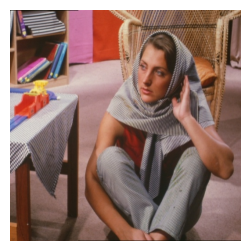

In [109]:
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image

def image_show(image):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.imshow(image)
    ax.axis('off')

image = np.asarray(Image.open('image.jpg'))
print('image.shape =', image.shape)

image_show(image)

С помощью библиотеки `numpy` выполните следующие пункты:
- зеркально отразите изображение `image` относительно горизонтали;
- поверните изображение `image` на 90˚ влево;
- поверните изображение `image` на 90˚ вправо.

Полученные изображения поместите в список `output`. В этом задании вам может пригодиться операция **транспонирования**.

In [ ]:
output = [
    image,                 # оригинальное изображение
    np.flipud(image),      # зеркальное отражение относительно горизонтали
    np.rot90(image),       # поворот на 90° влево (против часовой стрелки)
    np.rot90(image, k=-1)  # поворот на 90° вправо (по часовой стрелке)
]

In [110]:
fig, axes = plt.subplots(1, len(output), figsize=(16, 6))

for img, ax in zip(output, axes):
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

NameError: name 'output' is not defined